In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
images = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/FireSegmentation/FireSeg_images.npy')
masks = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/FireSegmentation/FireSeg_masks.npy')

In [3]:
X_test = images[10000:12000]
y_test = masks[10000:12000]

In [4]:
images = images[0:10000]
masks = masks[0:10000]

In [5]:
images.shape

(10000, 512, 512, 1)

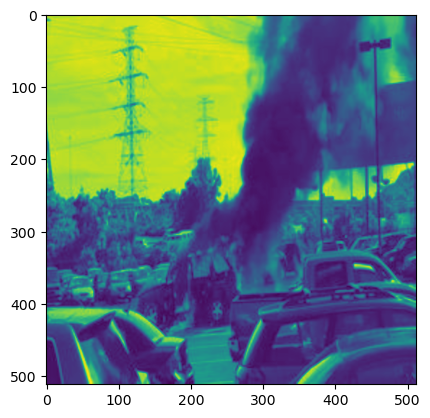

In [6]:
imshow(images[100])

In [7]:
masks.shape

(10000, 512, 512, 1)

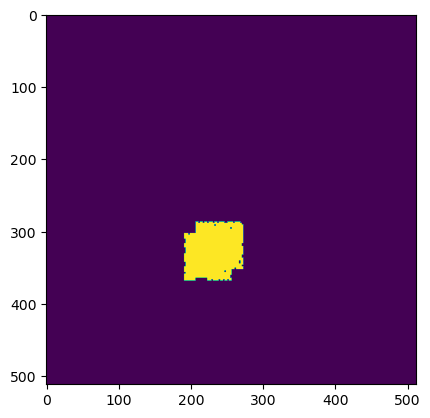

In [8]:
imshow(masks[100])

In [9]:
import sys
sys.path.append('../')
import gp2

In [10]:
from keras import losses

In [11]:
loss_fx = losses.BCE

In [12]:
C = gp2.KUC_UNet2D(loss=loss_fx, model_path='/tmp/tmpx71z76e4kuc_unet2d/kuc_unet2d_0kuc_unet2d_model')

*** GP2  KUC U-Net2D ***
Working directory: /tmp/tmpa74s40ffkuc_unet2d


In [13]:
from runner import Runner
R = Runner(verbose=True, workingdir=C.workingdir)

*** GP2 ***
Working directory: /tmp/tmpa74s40ffkuc_unet2d
Verbose mode active!


In [14]:
R.classifier = C ### use custom classifier

In [15]:
R.run(images, masks, runs=3, batch_size=16, shuffle=True, results_file='/raid/mpsych/OMAMA/GP2/results/kuc_unet2d_0kuc_unet2d_model_3_3_fireseg.pkl')

Shuffling data...
Weights OK!
******
Loop 1
Epoch 1/100
32/32 [==============================] - 33s 713ms/step - loss: 0.0370 - dice_coeff: 0.6938 - val_loss: 0.0346 - val_dice_coeff: 0.7343
Epoch 2/100
32/32 [==============================] - 15s 486ms/step - loss: 0.0296 - dice_coeff: 0.7482 - val_loss: 0.0329 - val_dice_coeff: 0.7365
Epoch 3/100
32/32 [==============================] - 15s 488ms/step - loss: 0.0258 - dice_coeff: 0.7805 - val_loss: 0.0359 - val_dice_coeff: 0.7303
Epoch 4/100
32/32 [==============================] - 15s 491ms/step - loss: 0.0239 - dice_coeff: 0.7983 - val_loss: 0.0366 - val_dice_coeff: 0.7478
Epoch 5/100
32/32 [==============================] - 15s 487ms/step - loss: 0.0222 - dice_coeff: 0.8116 - val_loss: 0.0389 - val_dice_coeff: 0.7518
Epoch 6/100
32/32 [==============================] - 15s 489ms/step - loss: 0.0204 - dice_coeff: 0.8250 - val_loss: 0.0399 - val_dice_coeff: 0.7469
Epoch 7/100
32/32 [==============================] - 15s 485ms/step 

In [16]:
R.classifier_scores

[[0.05530688911676407, 0.7355003952980042],
 [0.050223320722579956, 0.7392853498458862],
 [0.06589942425489426, 0.7507057785987854]]

In [17]:
R.discriminator_scores

[[0.0, 1.0], [0.0, 1.0], [0.0, 1.0]]

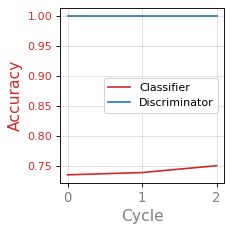

In [18]:
R.plot()

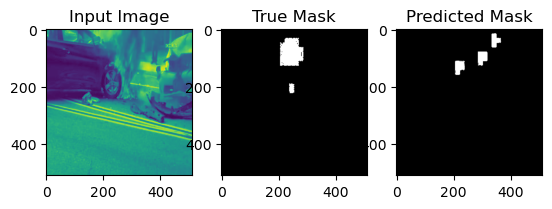

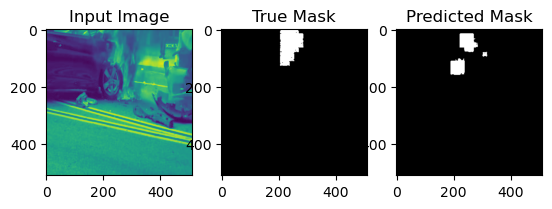

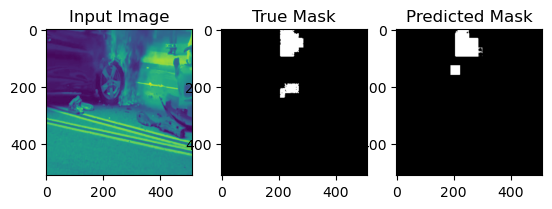

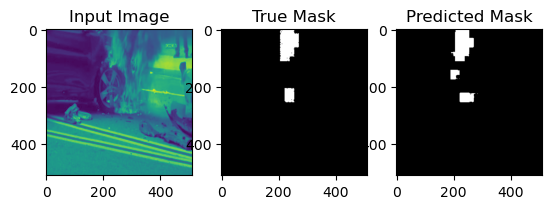

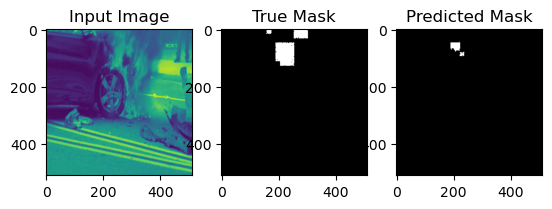

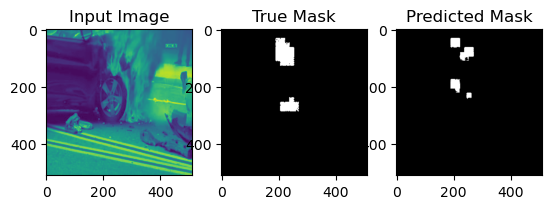

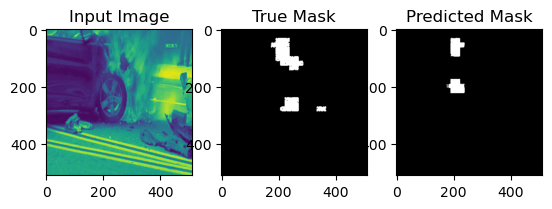

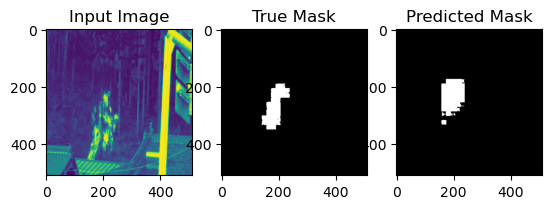

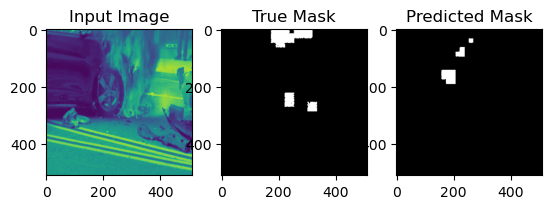

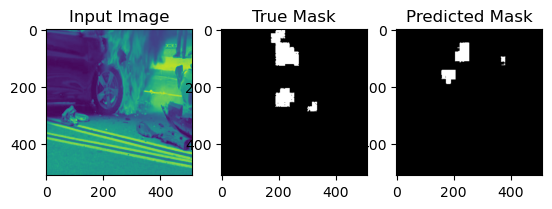

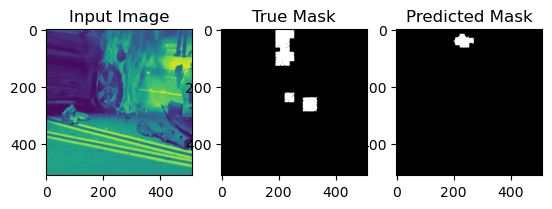

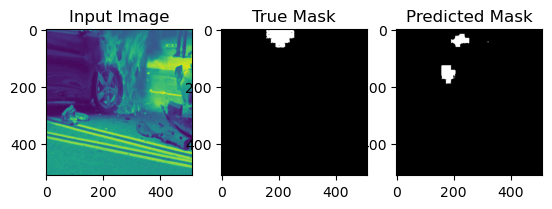

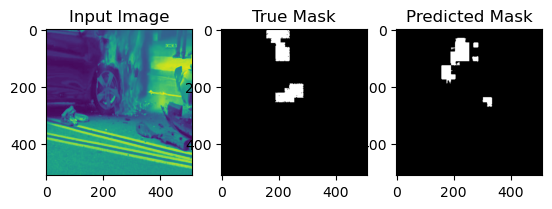

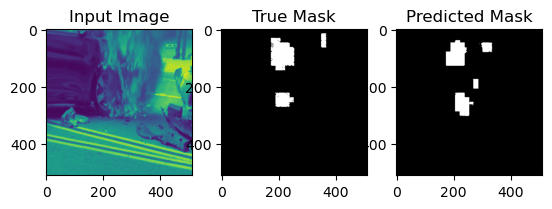

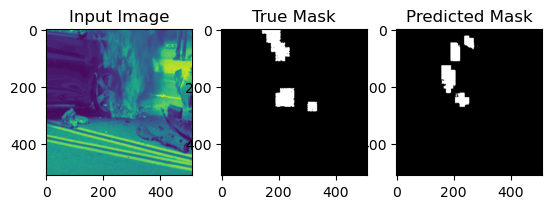

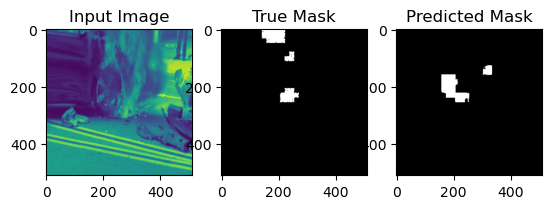

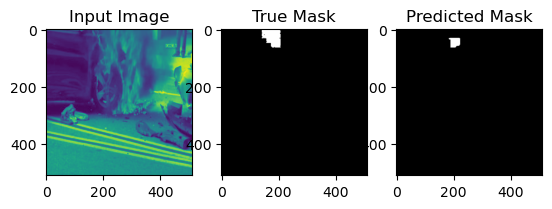

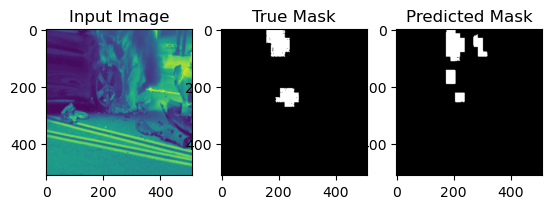

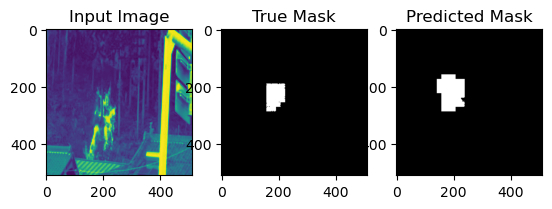

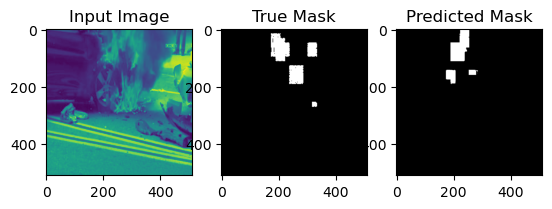

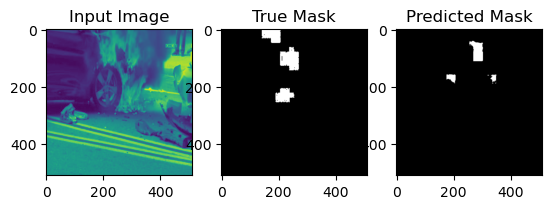

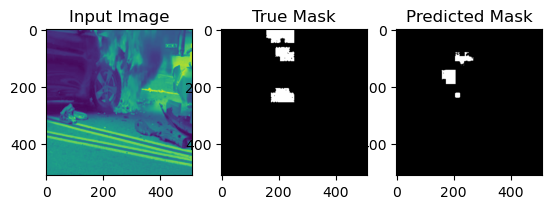

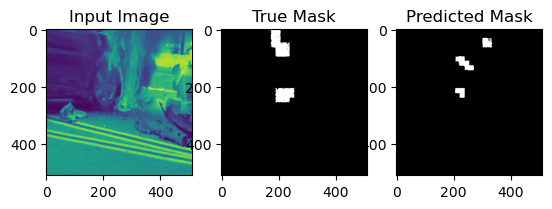

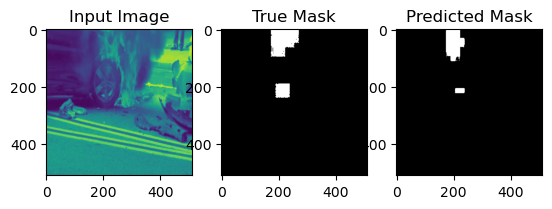

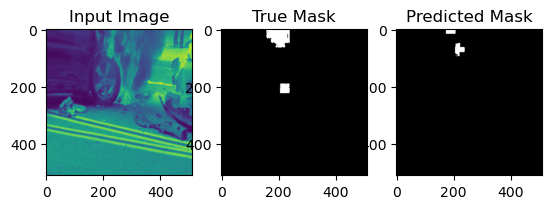

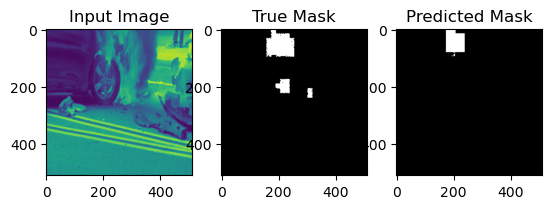

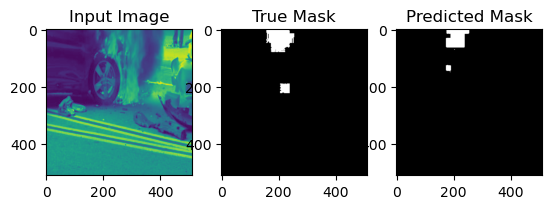

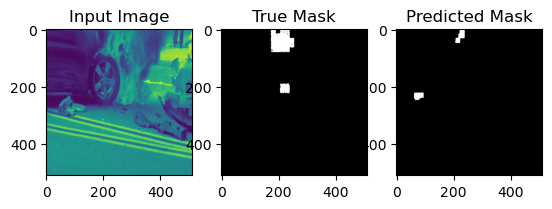

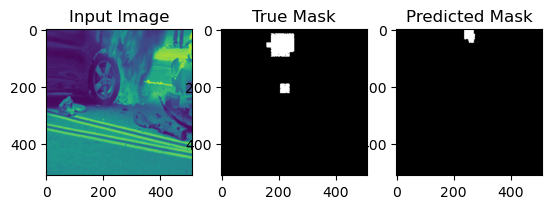

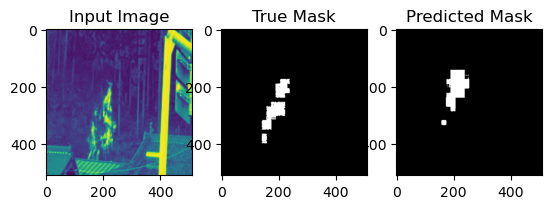

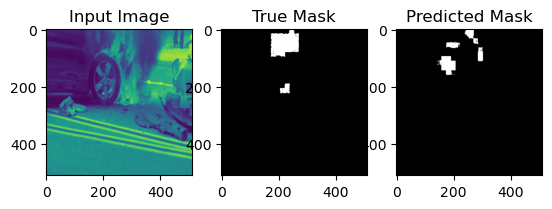

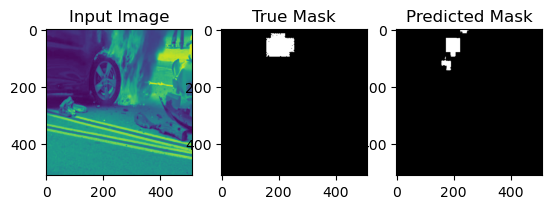

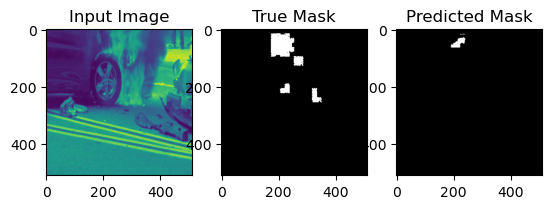

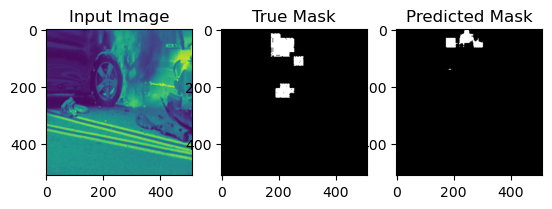

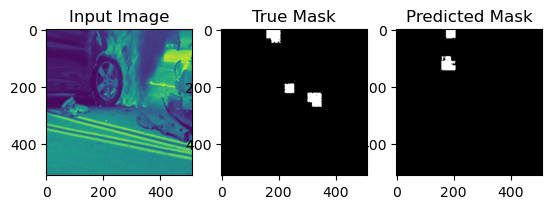

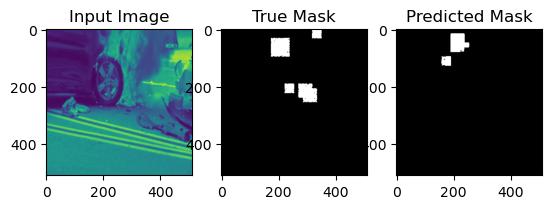

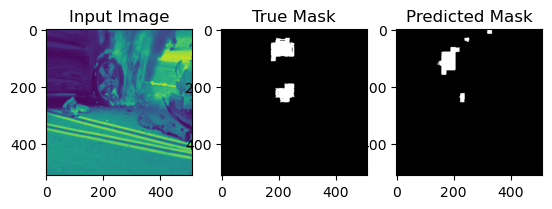

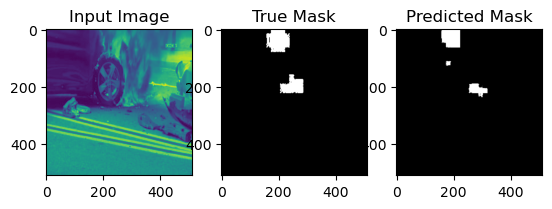

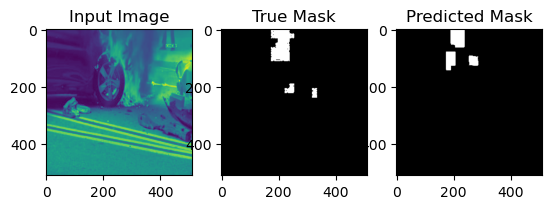

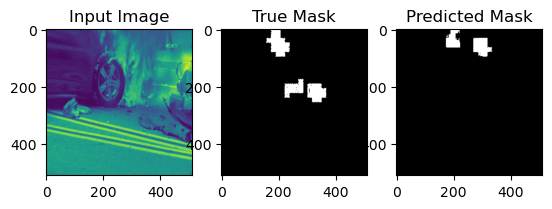

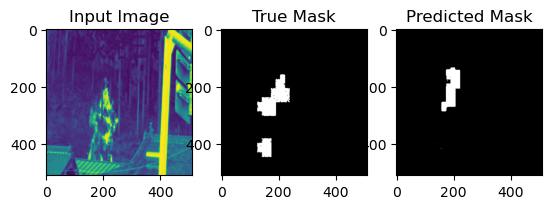

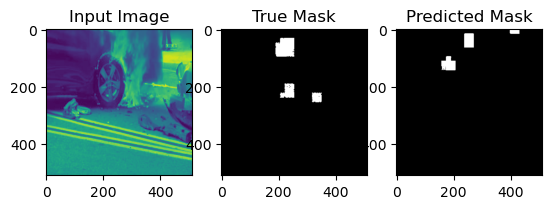

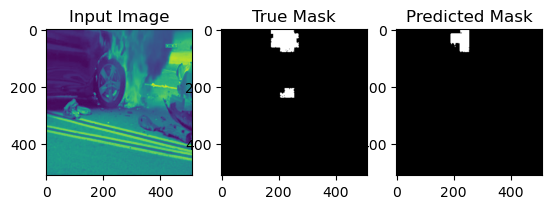

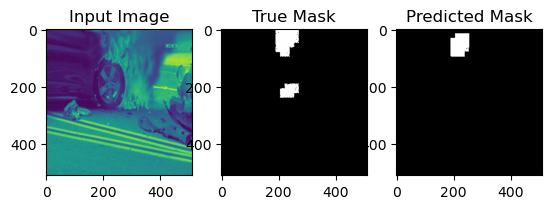

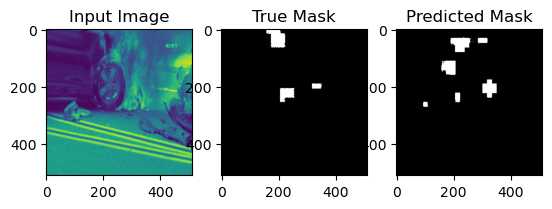

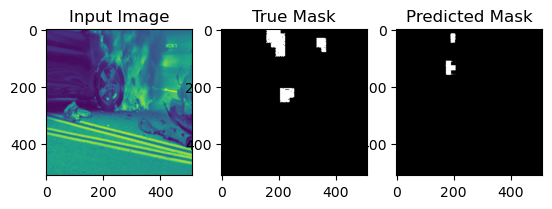

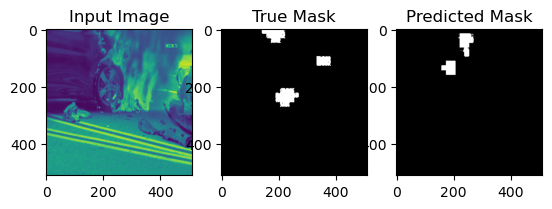

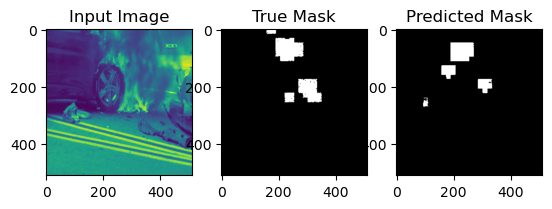

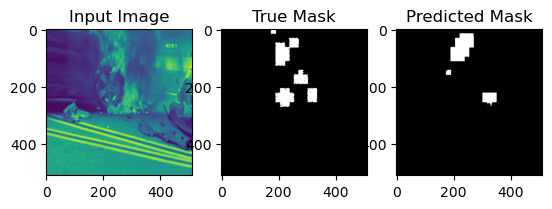

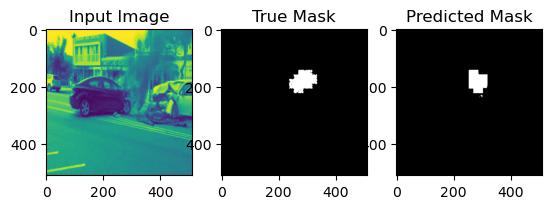

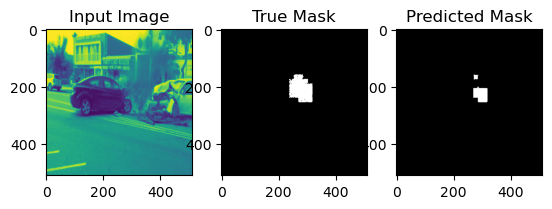

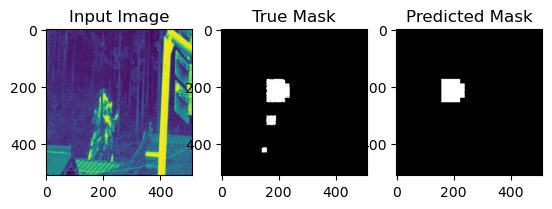

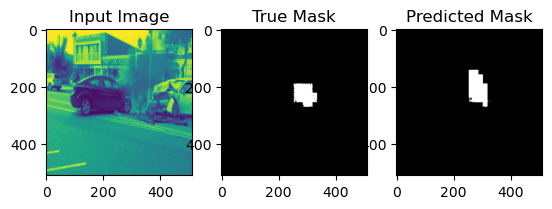

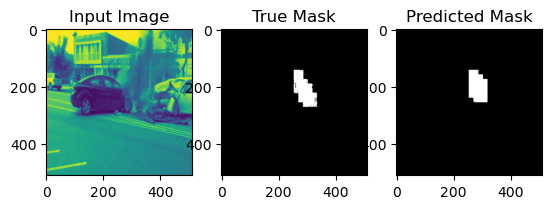

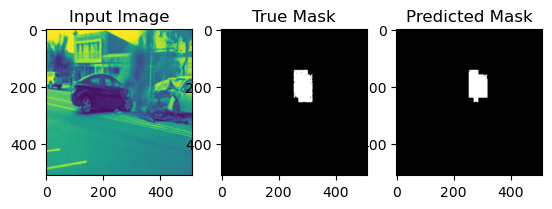

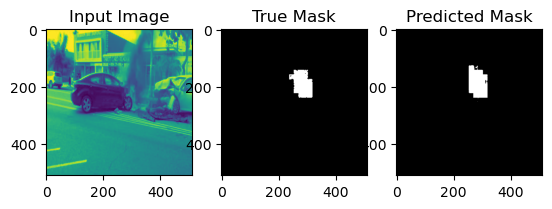

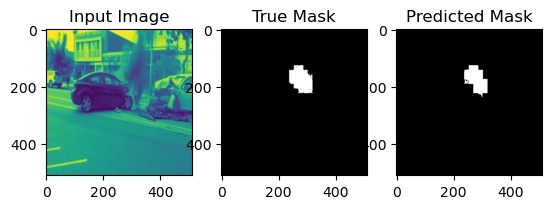

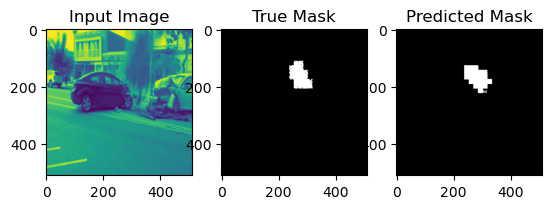

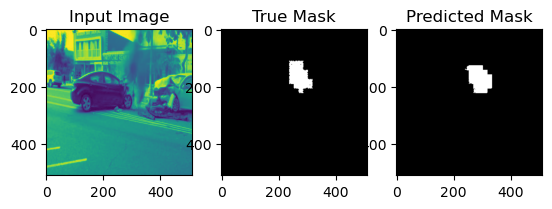

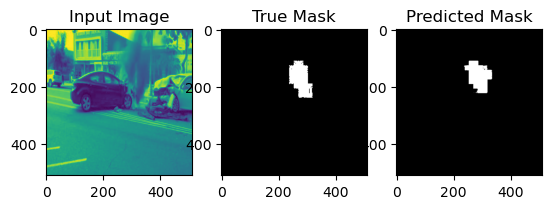

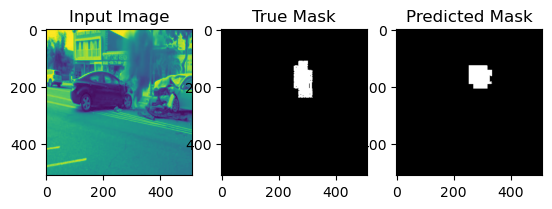

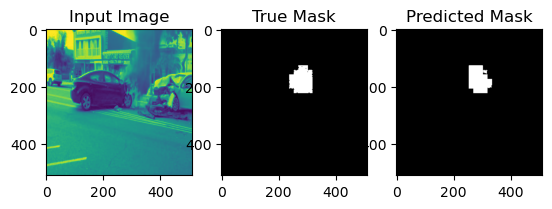

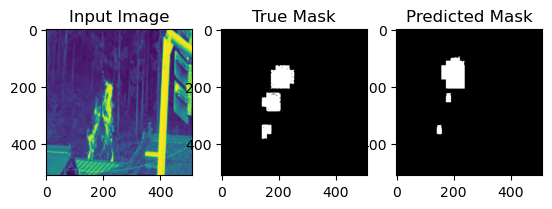

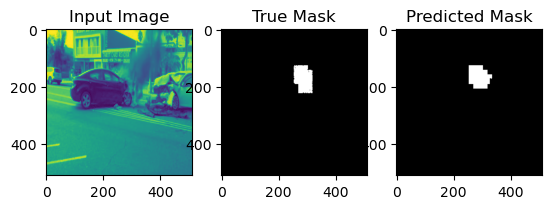

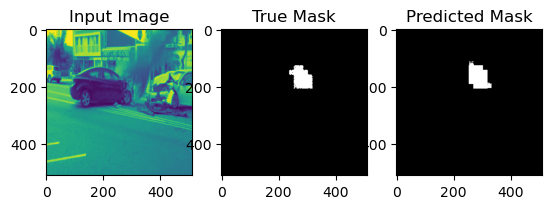

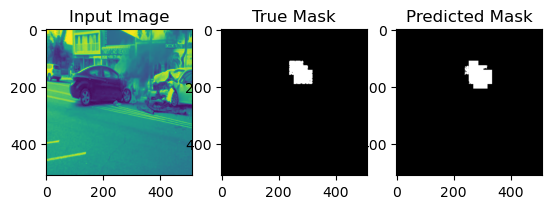

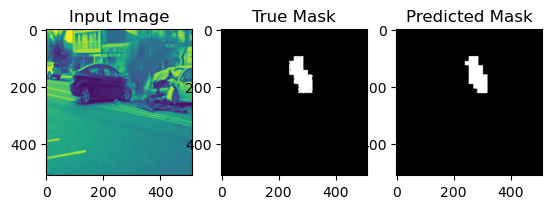

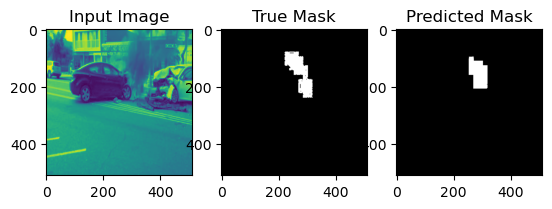

In [ ]:
gp2.Util.visualize_predictions(C, X_test, y_test, num_samples=100)

In [ ]:
y_pred = R.classifier.predict(X_test, y_test)

In [ ]:
y_pred

In [ ]:
BareBone = gp2.KUC_UNet2D(loss=loss_fx, model_path='/tmp/tmpx71z76e4kuc_unet2d/kuc_unet2d_0kuc_unet2d_model')

In [ ]:
barebone_pred = BareBone.predict(X_test, y_test)

In [ ]:
barebone_pred

In [ ]:
BareBone.model.metrics_names